<a href="https://colab.research.google.com/github/cal546/DSPS_CAdkins/blob/main/HW4/Galrotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy

Populating the interactive namespace from numpy and matplotlib


In [ ]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv",skiprows=[1])

In [ ]:
m31 = m31[['#M31', 'Grand', 'Rotation', 'Curve']].rename({'#M31':"r", 'Grand':'v', 'Rotation': 'dv', 'Curve':'err'}, axis =1)

In [ ]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [ ]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


In [ ]:
apparentSizeM31 = 3.167 #deg
distanceM31 = (765) #kpc

In [ ]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


In [ ]:
unc_dist = (0.11*(10**6))* u.lightyear
unc_dist_kiloparsec = np.around(unc_dist.to(u.kiloparsec),1)
unc_dist_kiloparsec

<Quantity 33.7 kpc>

In [ ]:
m31_size = m31angS.to(u.rad)*distanceM31*u.kiloparsec

In [ ]:
unc_size = m31angS.to(u.rad)*unc_dist_kiloparsec

In [ ]:
print("Size of the visible component of Andromeda is: {:.0f}".format(m31_size/u.rad), u"\u00B1"," {:.0f}".format(unc_size/u.rad))

Size of the visible component of Andromeda is: 42 kpc ±  2 kpc


In [ ]:
def getradii(gal, gsize, n):
  rads = np.array(gal.r)
  gsize = float(gsize/(u.rad*u.kiloparsec))
  for i in range(len(rads)):
    if (rads[i] > (gsize)*n):
      return i

In [ ]:
def plotGal(gal, rds):
  i1 = getradii(gal, rds, 1)
  i2 = getradii(gal, rds, 2)
  i3 = getradii(gal, rds, 3)
  
  
  pl.errorbar(gal.r,gal.v,yerr=gal.dv,label="V")
  pl.errorbar(gal.r[i1],gal.v[i1], gal.dv[i1], label="radius")
  pl.errorbar(gal.r[i2],gal.v[i2], yerr=gal.dv[i2], label="radius x2")
  pl.errorbar(gal.r[i3],gal.v[i3], yerr=gal.dv[i3], label="radius x3")
  pl.xlabel('Radius (kpc)')
  pl.ylabel('Velocity (km/s)')
  pl.xlim(0, 4*float(rds/(u.rad*u.kiloparsec)))
  pl.legend()

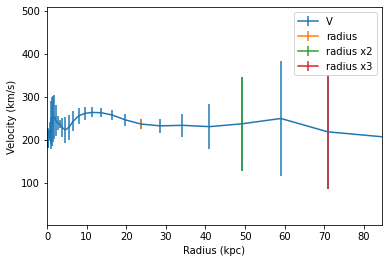

In [ ]:
plotGal(m31, m31_size/2)

In [227]:
def vratios(gal, rds, rd, err='dv'):
  i1 = getradii(gal, rds, 1)
  r_1 = gal.r[i1]
  v_1 = gal.v[i1]
  rad = arange(r_1,4*float(rds/(u.rad*u.kiloparsec)))
  v = v_1 * sqrt(r_1/rad)
  pl.plot(rad,v,'-',label='1/R')
  plotGal(gal,rds)
  print('Ratios are in velocity at radius')
  for i in [2,3]:
    n = getradii(gal, rds, i)
    print('For radius {:.0f} kpc for {:.0f} times the Galaxies Radius'.format(gal.r[n],i))
    expect = (v_1*np.sqrt(r_1/gal.r[n]))/gal.v[n]
    print('the expected ratio based on the radii is {:.2f},'.format(expect))
    unex = (v_1*np.sqrt(r_1/gal.err[n]))/gal.v[n]
    print('the calculated ratio using ```dv```, and its uncertainty is {:.2f}'.format(unex))
    upper = expect +2*unex
    lower = expect -2*unex
    print('the 2-$\sigma$ upper and lower limits of the calculated ratio are {:.2f} to {:.2f}'.format(upper,lower))
    print('It is {0} that the expected ratio is within the $2-\sigma$ of the calculated ratio'.format((expect > lower) and (expect < upper)))

Ratios are in velocity at radius
For radius 49 kpc for 2 times the Galaxies Radius
the expected ratio based on the radii is 0.69,
the calculated ratio using ```dv```, and its uncertainty is 0.99
the 2-$\sigma$ upper and lower limits of the calculated ratio are 2.68 to -1.29
It is True that the expected ratio is within the $2-\sigma$ of the calculated ratio
For radius 71 kpc for 3 times the Galaxies Radius
the expected ratio based on the radii is 0.63,
the calculated ratio using ```dv```, and its uncertainty is 1.06
the 2-$\sigma$ upper and lower limits of the calculated ratio are 2.75 to -1.50
It is True that the expected ratio is within the $2-\sigma$ of the calculated ratio


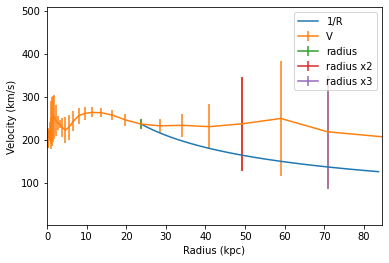

In [228]:
vratios(m31,m31_size/2,0)

Discussion
* The difference in the expected velocity as compared to the measured velocity was not significant enough to pass the 2 sigma test.
* The errors for the observations that were very large, roughly 30 percent larger than the observed difference. The error bars were so large that the calculated ratio was negative on the lower bound.

In [ ]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/mw.csv",skiprows=[1])

In [ ]:
mw = mw[['#MW', 'Grand', 'Rotation', 'Curve']].rename({'#MW':"r", 'Grand':'v', 'Rotation': 'dv', 'Curve':'err'}, axis =1)

In [ ]:
mw.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [ ]:
mw.describe()

,r,v,dv,err
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249062,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


In [ ]:
mw_size = 56.7 * u.kiloparsec * u.rad

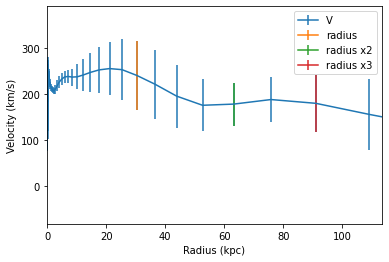

In [ ]:
plotGal(mw, mw_size/2)

Ratios are in velocity at radius
For radius 63 kpc for 2 times the Galaxies Radius
the expected ratio based on the radii is 0.94,
the calculated ratio using ```dv```, and its uncertainty is 1.84
the 2-$\sigma$ upper and lower limits of the calculated ratio are 4.62 to -2.75
It is True that the expected ratio is within the $2-\sigma$ of the calculated ratio
For radius 91 kpc for 3 times the Galaxies Radius
the expected ratio based on the radii is 0.77,
the calculated ratio using ```dv```, and its uncertainty is 1.61
the 2-$\sigma$ upper and lower limits of the calculated ratio are 4.00 to -2.45
It is True that the expected ratio is within the $2-\sigma$ of the calculated ratio


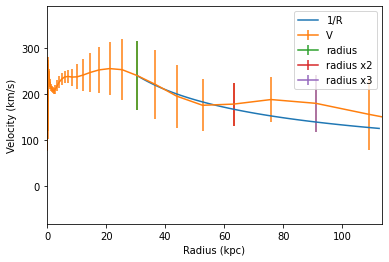

In [229]:
vratios(mw,mw_size/2,0)

* Here, we observe a similar result as with Andromeda, the error in our measurement were too large for the observed velocity to pass the 2 sigma mark. Again, the error bars we large enough to produce a negative ration on the lower bound.